In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/Housing.csv')
#Checking the dataset
data.head()
m = len(data)

In [ ]:
data.head()



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
#splitting data frame into 80% and 20%
np.random.seed(0)
dataTrain, dataTest = train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [ ]:
list1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataTrainA = dataTrain[list1]
dataTestA = dataTest[list1]
dataTrainA.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [ ]:
dataTrainA.shape

(436, 6)

In [ ]:
xTrain = dataTrainA.values[:,1:6]
xTest = dataTestA.values[:,1:6]
yTrain = dataTrainA.values[:,0]
yTest = dataTestA.values[:,0]
xTrain.shape

(436, 5)

In [ ]:
xTest.shape

(109, 5)

In [ ]:
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

In [ ]:
x21 = xTrain.reshape(436, 5)
x22 = xTest.reshape(109, 5)

In [ ]:
xTrainNew = np.hstack((x11, x21))
xTestNew = np.hstack((x12, x22))
xTrainNew.shape

(436, 6)

In [ ]:
iterations = 1000;
alpha = 0.000000001;
theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [ ]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  costHistoryTrain = np.zeros(iterations)
  costHistoryTest = np.zeros(iterations)
  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    costHistoryTrain[i] = compute_cost(X1, Y1, theta)
    costHistoryTest[i] = compute_cost(X2, Y2, theta)
  return theta, costHistoryTrain, costHistoryTest

In [ ]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNew, xTestNew, yTrain,yTest, theta, alpha, iterations)
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-
1])


Final value of theta = [4.16134544e-01 8.61036321e+02 1.49720341e+00 7.88268207e-01
 1.19127741e+00 3.85293408e-01]
costHistoryTrain = 1363688825124.9084 costHistoryTest=  310132134530.36285


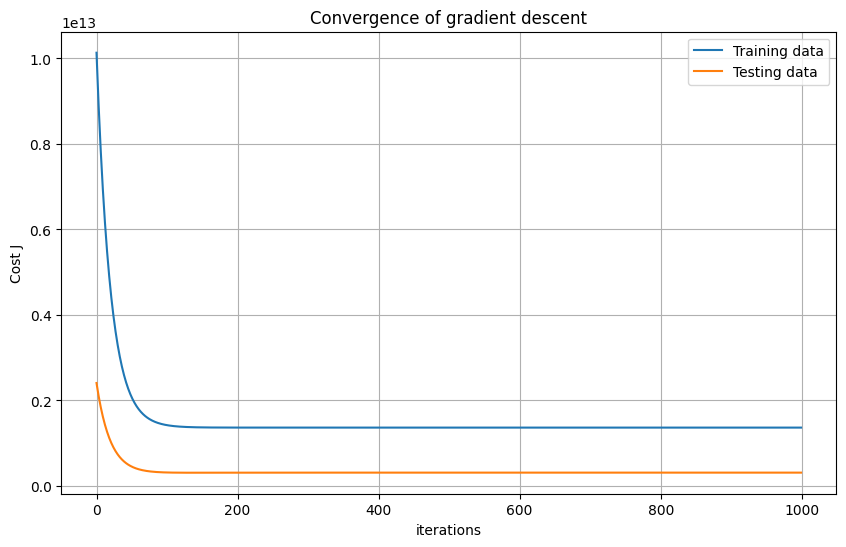

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[4.16134544e-01 8.61036321e+02 1.49720341e+00 7.88268207e-01
 1.19127741e+00 3.85293408e-01]


In [ ]:
# Ques 2A, Normalization
data = pd.DataFrame(pd.read_csv('/Housing.csv'))
data.head()
m = len(data)

In [ ]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [ ]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataTrainB = dataTrain[list2]
dataTestB = dataTest[list2]
dataTrainB.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [ ]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer

#scaler = StandardScaler() #uncomment when testing standardization
scaler = Normalizer() #uncomment when testing normalization
#scaler = MinMaxScaler() #uncomment when testing Minmaxscaler

#dataTrainB[list2] = scaler(dataTrainB[list2]) #for normalize
#dataTestB[list2] = scaler(dataTestB[list2])
dataTrainB[list1] = scaler.fit_transform(dataTrainB[list1])
dataTestB[list1] = scaler.fit_transform(dataTestB[list1])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,0.000000e+00
496,0.999999,0.001484,7.421142e-07,3.710571e-07,3.710571e-07,0.000000e+00
484,0.999999,0.001059,6.968637e-07,3.484319e-07,3.484319e-07,0.000000e+00
507,0.999999,0.001390,7.722000e-07,3.861000e-07,3.861000e-07,0.000000e+00
252,0.999998,0.002184,6.644502e-07,2.214834e-07,2.214834e-07,0.000000e+00
263,1.000000,0.000900,6.802718e-07,2.267573e-07,4.535146e-07,0.000000e+00
240,1.000000,0.000838,6.543073e-07,2.181024e-07,4.362049e-07,2.181024e-07
175,0.999998,0.001867,7.619034e-07,3.809517e-07,3.809517e-07,3.809517e-07
385,0.999999,0.001020,5.602238e-07,2.801119e-07,2.801119e-07,0.000000e+00
374,1.000000,0.000967,5.494503e-07,5.494503e-07,2.747251e-07,0.000000e+00


In [ ]:
xTrain2 = dataTrainB.values[:,1:6]
xTest2 = dataTestB.values[:,1:6]
yTrain2 = dataTrainB.values[:,0]
yTest2 = dataTestB.values[:,0]
xTrain2.shape

(436, 5)

In [ ]:
x31 = np.ones((436, 1))
x32 = np.ones((109, 1))

In [ ]:
x41 = xTrain2.reshape(436, 5)
x42 = xTest2.reshape(109, 5)

In [ ]:
xTrainNew2 = np.hstack((x31, x41))
xTestNew2 = np.hstack((x32, x42))
xTrainNew2.shape

(436, 6)

In [ ]:
iterations = 1000;
alpha = 0.01;
theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [ ]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  costHistoryTrain = np.zeros(iterations)
  costHistoryTest = np.zeros(iterations)
  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    costHistoryTrain[i] = compute_cost(X1, Y1, theta)
    costHistoryTest[i] = compute_cost(X2, Y2, theta)
  return theta, costHistoryTrain, costHistoryTest

In [ ]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNew2, xTestNew2, yTrain2, yTest2, theta, alpha, iterations)
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-
1])

Final value of theta = [9.99673091e-01 1.14635808e-03 6.88542215e-07 2.90254116e-07
 4.07258102e-07 1.45736036e-07]
costHistoryTrain = 4.220853601404382e-08 costHistoryTest=  1.0557385942524042e-08


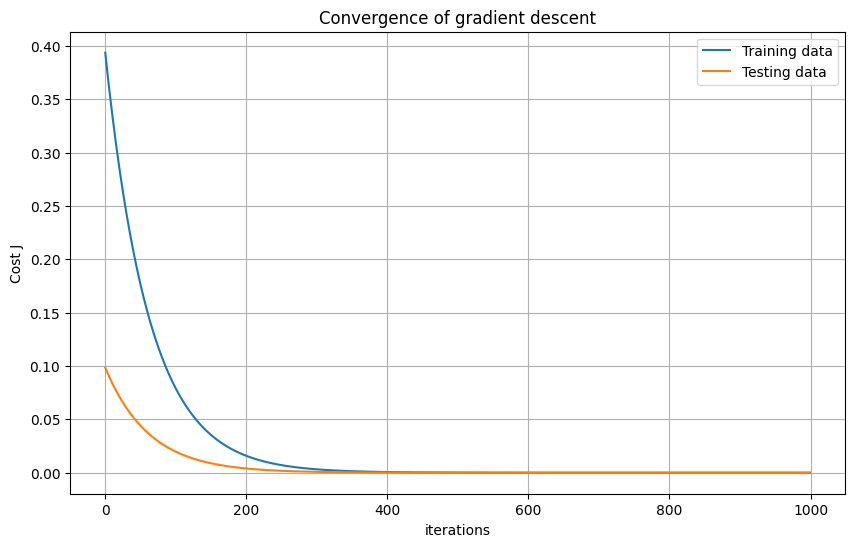

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[9.99673091e-01 1.14635808e-03 6.88542215e-07 2.90254116e-07
 4.07258102e-07 1.45736036e-07]


In [ ]:
#Ques 2A, Standardization
data = pd.DataFrame(pd.read_csv('/Housing.csv'))
data.head()
m = len(data)

In [ ]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest = train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [ ]:
list1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataTrainB = dataTrain[list1]
dataTestB = dataTest[list1]
dataTrainB.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [ ]:
#from matplotlib.colors import Normalize
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = StandardScaler() #uncomment when testing standardization
#scaler = Normalizer() #uncomment when testing normalization
#scaler = MinMaxScaler() #uncomment when testing Minmax
# dataTrainB[list2] = scaler(dataTrainB[list2]) #for normalize
# dataTestB[list2] = scaler(dataTestB[list2])
dataTrainB[list2] = scaler.fit_transform(dataTrainB[list1])
dataTestB[list2] = scaler.fit_transform(dataTestB[list1])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,-0.819149
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-0.819149
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.325559
175,0.247444,2.175399,1.399408,1.475561,0.212914,1.470267
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,-0.819149
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,-0.819149


In [ ]:
xTrain2 = dataTrainB.values[:,1:6]
xTest2 = dataTestB.values[:,1:6]
yTrain2 = dataTrainB.values[:,0]
yTest2 = dataTestB.values[:,0]
xTrain2.shape

(436, 5)

In [ ]:
x31 = np.ones((436, 1))
x32 = np.ones((109, 1))

In [ ]:
x41 = xTrain2.reshape(436, 5)
x42 = xTest2.reshape(109, 5)

In [ ]:
xTrainNew2 = np.hstack((x31, x41))
xTestNew2 = np.hstack((x32, x42))
xTrainNew2.shape

(436, 6)

In [ ]:
iterations = 1000;
alpha = 0.01;
theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [ ]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  costHistoryTrain = np.zeros(iterations)
  costHistoryTest = np.zeros(iterations)
  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    costHistoryTrain[i] = compute_cost(X1, Y1, theta)
    costHistoryTest[i] = compute_cost(X2, Y2, theta)
  return theta, costHistoryTrain, costHistoryTest

In [ ]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNew2, xTestNew2, yTrain2, yTest2, theta, alpha, iterations)
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-
1])

Final value of theta = [2.68303219e-16 3.87870620e-01 9.04102358e-02 3.03604550e-01
 2.39617915e-01 1.60569409e-01]
costHistoryTrain = 0.17847785867645652 costHistoryTest=  0.03892348541035558


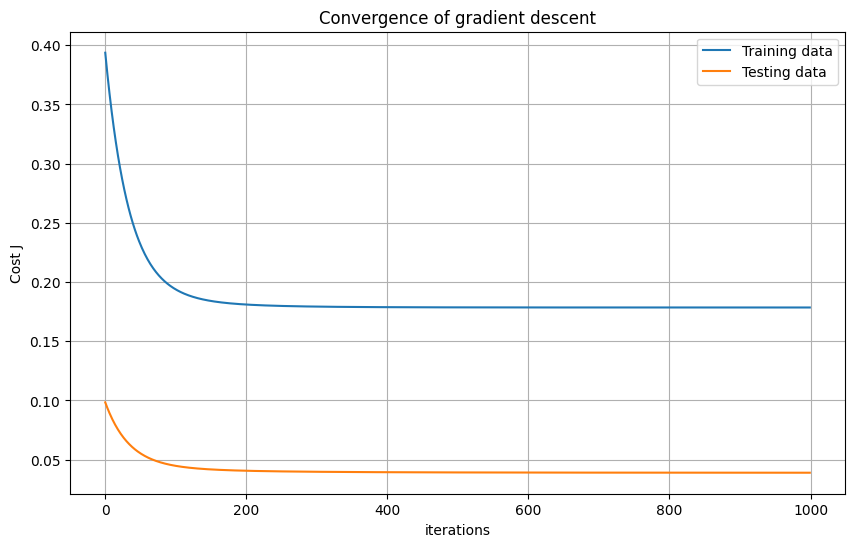

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[2.68303219e-16 3.87870620e-01 9.04102358e-02 3.03604550e-01
 2.39617915e-01 1.60569409e-01]


In [ ]:
# Ques 3A, Normalizer
data = pd.DataFrame(pd.read_csv('/Housing.csv'))
data.head()
m = len(data)

In [ ]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest = train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [ ]:
list1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataTrainC = dataTrain[list1]
dataTestC = dataTest[list1]
dataTrainC.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [ ]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
# scaler = StandardScaler()
scaler = Normalizer()
#scaler = MinMaxScaler()
dataTrainC[list1] = scaler.fit_transform(dataTrainC[list1])
dataTestC[list1] = scaler.fit_transform(dataTestC[list1])
dataTrainC.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,0.000000e+00
496,0.999999,0.001484,7.421142e-07,3.710571e-07,3.710571e-07,0.000000e+00
484,0.999999,0.001059,6.968637e-07,3.484319e-07,3.484319e-07,0.000000e+00
507,0.999999,0.001390,7.722000e-07,3.861000e-07,3.861000e-07,0.000000e+00
252,0.999998,0.002184,6.644502e-07,2.214834e-07,2.214834e-07,0.000000e+00
263,1.000000,0.000900,6.802718e-07,2.267573e-07,4.535146e-07,0.000000e+00
240,1.000000,0.000838,6.543073e-07,2.181024e-07,4.362049e-07,2.181024e-07
175,0.999998,0.001867,7.619034e-07,3.809517e-07,3.809517e-07,3.809517e-07
385,0.999999,0.001020,5.602238e-07,2.801119e-07,2.801119e-07,0.000000e+00
374,1.000000,0.000967,5.494503e-07,5.494503e-07,2.747251e-07,0.000000e+00


In [ ]:
xTrain3 = dataTrainC.values[:,1:6]
xTest3 = dataTestC.values[:,1:6]
yTrain3 = dataTrainC.values[:,0]
yTest3 = dataTestC.values[:,0]
xTrain3.shape

(436, 5)

In [ ]:
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

In [ ]:
x21 = xTrain3.reshape(436, 5)
x22 = xTest3.reshape(109, 5)

In [ ]:
xTrainNew3 = np.hstack((x11, x21))
xTestNew3 = np.hstack((x12, x22))
xTrainNew3.shape

(436, 6)

In [ ]:
iterations = 5000;
alpha = 0.01;
lamda : 3
theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def compute_cost_reg(X, Y, theta, lamda):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  sqrErrors = np.sum(sqrErrors)
  reg_term = lamda * np.sum(np.square(theta))
  J = 1 / (2 * m) * np.sum(sqrErrors + reg_term)
  return J

In [ ]:
def gradient_descent_reg(X1, X2, Y1 , Y2, theta, alpha, iterations, lamda):
  costHistoryTrain = np.zeros(iterations)
  costHistoryTest = np.zeros(iterations)
  lamda = 3
  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    costHistoryTrain[i] = compute_cost_reg(X1, Y1, theta, lamda)
    costHistoryTest[i] = compute_cost(X2, Y2, theta)
  return theta, costHistoryTrain, costHistoryTest

In [ ]:
theta, costHistoryTrain, costHistoryTest = gradient_descent_reg(xTrainNew3, xTestNew3, yTrain3, yTest3, theta, alpha, iterations, lamda=3 )
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-
1])

Final value of theta = [9.99997929e-01 1.14671381e-03 6.88763660e-07 2.90347839e-07
 4.07390131e-07 1.45782460e-07]
costHistoryTrain = 0.002752285795607559 costHistoryTest=  1.0465450984661629e-13


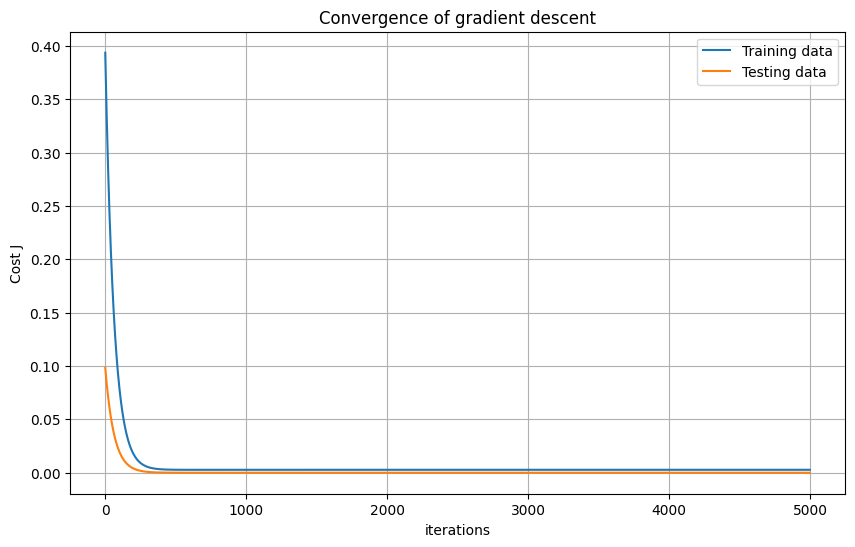

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[9.99997929e-01 1.14671381e-03 6.88763660e-07 2.90347839e-07
 4.07390131e-07 1.45782460e-07]


In [ ]:
# Ques 3A, Standardizer
data = pd.DataFrame(pd.read_csv('/Housing.csv'))
data.head()
m = len(data)
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
dataTrainC = dataTrain[list2]
dataTestC = dataTest[list2]
dataTrainC.head()

,price,area,bedrooms,bathrooms,stories,parking
542,1750000,3620,2,1,1,0
496,2695000,4000,2,1,1,0
484,2870000,3040,2,1,1,0
507,2590000,3600,2,1,1,0
252,4515000,9860,3,1,1,0


In [ ]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = StandardScaler()
#scaler = Normalizer()
#scaler = MinMaxScaler()
dataTrainC[list2] = scaler.fit_transform(dataTrainC[list2]) #for standardize
dataTestC[list2] = scaler.fit_transform(dataTestC[list2])
dataTrainC.head(10)

,price,area,bedrooms,bathrooms,stories,parking
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,-0.819149
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-0.819149
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.325559
175,0.247444,2.175399,1.399408,1.475561,0.212914,1.470267
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,-0.819149
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,-0.819149


In [ ]:
xTrain3 = dataTrainC.values[:,1:6]
xTest3 = dataTestC.values[:,1:6]
yTrain3 = dataTrainC.values[:,0]
yTest3 = dataTestC.values[:,0]
xTrain3.shape

(436, 5)

In [ ]:
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

x21 = xTrain3.reshape(436, 5)
x22 = xTest3.reshape(109, 5)

xTrainNew3 = np.hstack((x11, x21))
xTestNew3 = np.hstack((x12, x22))
xTrainNew3.shape

(436, 6)

In [ ]:
iterations = 1000;
alpha = 0.01;
# lamda : 0.5
theta = [0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def compute_cost_reg(X, Y, theta, lamda):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  sqrErrors = np.sum(sqrErrors)
  reg_term = lamda * np.sum(np.square(theta))
  J = 1 / (2 * m) * np.sum(sqrErrors + reg_term)
  return J

In [ ]:
def gradient_descent_reg(X1, X2, Y1 , Y2, theta, alpha, iterations, lamda):
  costHistoryTrain = np.zeros(iterations)
  costHistoryTest = np.zeros(iterations)
  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    costHistoryTrain[i] = compute_cost_reg(X1, Y1, theta, lamda)
    costHistoryTest[i] = compute_cost(X2, Y2, theta)
  return theta, costHistoryTrain, costHistoryTest

In [ ]:
theta, costHistoryTrain, costHistoryTest = gradient_descent_reg(xTrainNew3, xTestNew3, yTrain3, yTest3, theta, alpha, iterations, lamda=5)
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-
1])

Final value of theta = [2.68303219e-16 3.87870620e-01 9.04102358e-02 3.03604550e-01
 2.39617915e-01 1.60569409e-01]
costHistoryTrain = 0.18000993496618978 costHistoryTest=  0.03892348541035558


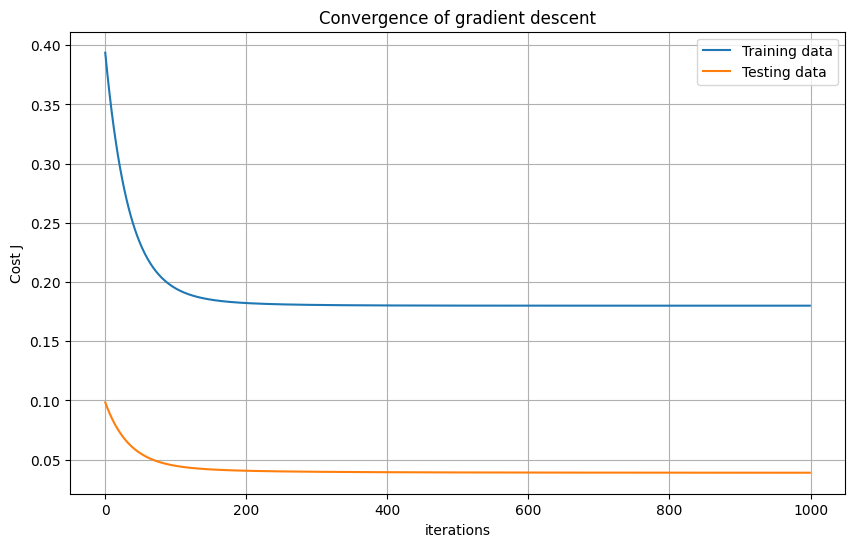

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[2.68303219e-16 3.87870620e-01 9.04102358e-02 3.03604550e-01
 2.39617915e-01 1.60569409e-01]


In [ ]:
# Ques 1B
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.DataFrame(pd.read_csv('/Housing.csv'))
data.head()
m = len(data)

#converting yes's & no's to 1s & 0s as strings cannot be used only int
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
#To not get any faulty errors eg Nan also not asked in Q -
data = data.drop(labels = "furnishingstatus",axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 12)

In [ ]:
list1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataTrainA = dataTrain[list1]
dataTestA = dataTest[list1]
dataTrainA.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [ ]:
dataTrainA.shape

(436, 12)

In [ ]:
yTrain = dataTrainA.values[:,0]
xTrain = dataTrainA.values[:,1:12]
yTest = dataTestA.values[:,0]
xTest = dataTestA.values[:,1:12]
xTrain.shape

(436, 11)

In [ ]:
xTest.shape

(109, 11)

In [ ]:
x11 = np.ones((436, 1))
x12 = np.ones((109, 1))

x21 = xTrain.reshape(436, 11)
x22 = xTest.reshape(109, 11)

xTrainNew = np.hstack((x11, x21))

xTrainNew = np.hstack((x11, x21))
xTestNew = np.hstack((x12, x22))
xTrainNew.shape

(436, 12)

In [ ]:
iterations = 1000;
alpha = 0.000000001;
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [ ]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  costHistoryTrain = np.zeros(iterations)
  costHistoryTest = np.zeros(iterations)
  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    costHistoryTrain[i] = compute_cost(X1, Y1, theta)
    costHistoryTest[i] = compute_cost(X2, Y2, theta)
  return theta, costHistoryTrain, costHistoryTest

theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNew, xTestNew, yTrain, yTest, theta, alpha, iterations)
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])


Final value of theta = [4.16134503e-01 8.61036221e+02 1.49720328e+00 7.88268149e-01
 1.19127732e+00 3.76967060e-01 1.56671026e-01 2.57835061e-01
 6.13757700e-02 2.98030922e-01 3.85293377e-01 1.71925936e-01]
costHistoryTrain = 1363688558628.3276 costHistoryTest=  310132069893.81555


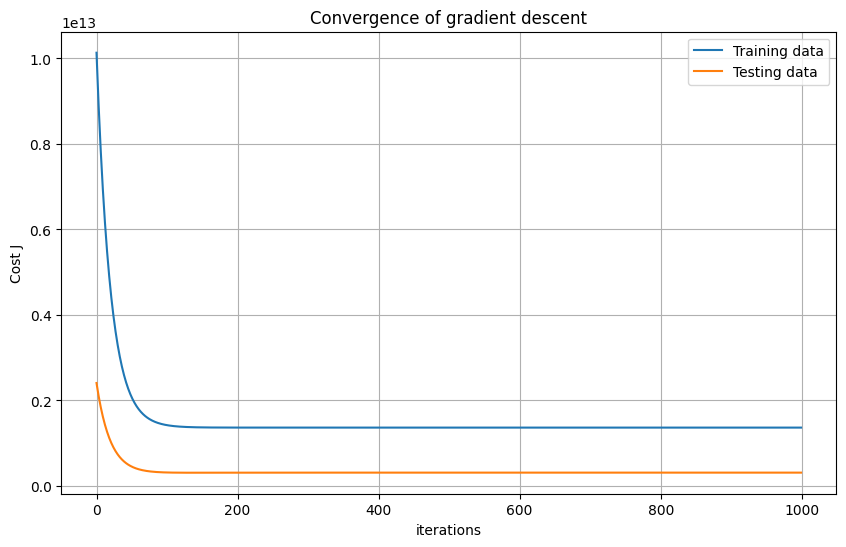

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[4.16134503e-01 8.61036221e+02 1.49720328e+00 7.88268149e-01
 1.19127732e+00 3.76967060e-01 1.56671026e-01 2.57835061e-01
 6.13757700e-02 2.98030922e-01 3.85293377e-01 1.71925936e-01]


In [ ]:
# Ques 2B, Normalization
data = pd.DataFrame(pd.read_csv('/Housing.csv'))
data.head()
m = len(data)

#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [ ]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
data = data.drop(labels = "furnishingstatus",axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest = train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 12)

In [ ]:
list1 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataTrainB = dataTrain[list1]
dataTestB = dataTest[list1]
dataTrainB.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [ ]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
#scaler = StandardScaler() #uncomment when testing standardization

#scaler = MinMaxScaler(). #uncomment when testing Minmaxscaler
scaler = Normalizer()
dataTrainB[list2] = scaler.fit_transform(dataTrainB[list2])
dataTestB[list2] = scaler.fit_transform(dataTestB[list2])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,0.999998,0.002069,1.142855e-06,5.714273e-07,5.714273e-07,5.714273e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
496,0.999999,0.001484,7.421142e-07,3.710571e-07,3.710571e-07,3.710571e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
484,0.999999,0.001059,6.968637e-07,3.484319e-07,3.484319e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
507,0.999999,0.001390,7.722000e-07,3.861000e-07,3.861000e-07,3.861000e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
252,0.999998,0.002184,6.644502e-07,2.214834e-07,2.214834e-07,2.214834e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
263,1.000000,0.000900,6.802718e-07,2.267573e-07,4.535146e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
240,1.000000,0.000838,6.543073e-07,2.181024e-07,4.362049e-07,2.181024e-07,0.000000e+00,0.000000e+00,0.0,0.0,2.181024e-07,2.181024e-07
175,0.999998,0.001867,7.619034e-07,3.809517e-07,3.809517e-07,1.904759e-07,1.904759e-07,0.000000e+00,0.0,0.0,3.809517e-07,0.000000e+00
385,0.999999,0.001020,5.602238e-07,2.801119e-07,2.801119e-07,2.801119e-07,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00
374,1.000000,0.000967,5.494503e-07,5.494503e-07,2.747251e-07,2.747251e-07,0.000000e+00,2.747251e-07,0.0,0.0,0.000000e+00,0.000000e+00


In [ ]:
dataTrainB.shape


(436, 12)

In [ ]:
yTrainB = dataTrainB.values[:,0]
xTrainB = dataTrainB.values[:,1:12]
yTestB = dataTestB.values[:,0]
xTestB = dataTestB.values[:,1:12]
xTrainB.shape

(436, 11)

In [ ]:
xTestB.shape

(109, 11)

In [ ]:
# 1 column of ones
x31 = np.ones((436, 1))
x32 = np.ones((109, 1))

# 1d to 2d
x41 = xTrainB.reshape(436, 11)
x42 = xTestB.reshape(109, 11)

xTrainNewB = np.hstack((x31, x41))
xTestNewB = np.hstack((x32, x42))
xTrainNewB.shape

(436, 12)

In [ ]:
iterations = 1000;
alpha = 0.01;
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J

In [ ]:
def gradient_descent(X1, X2, Y1 , Y2, theta, alpha, iterations):
  costHistoryTrain = np.zeros(iterations)
  costHistoryTest = np.zeros(iterations)
  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    costHistoryTrain[i] = compute_cost(X1, Y1, theta)
    costHistoryTest[i] = compute_cost(X2, Y2, theta)
  return theta, costHistoryTrain, costHistoryTest

In [ ]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNewB, xTestNewB, yTrainB, yTestB, theta, alpha, iterations)
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])
# print('costHistoryTest array =')
# costHistoryTest

Final value of theta = [9.99673091e-01 1.14635808e-03 6.88542215e-07 2.90254116e-07
 4.07258102e-07 1.99021182e-07 3.28132476e-08 6.83660767e-08
 7.81297850e-09 6.03495191e-08 1.45736036e-07 4.50717928e-08]
costHistoryTrain = 4.2208536013987686e-08 costHistoryTest=  1.0557385942597392e-08


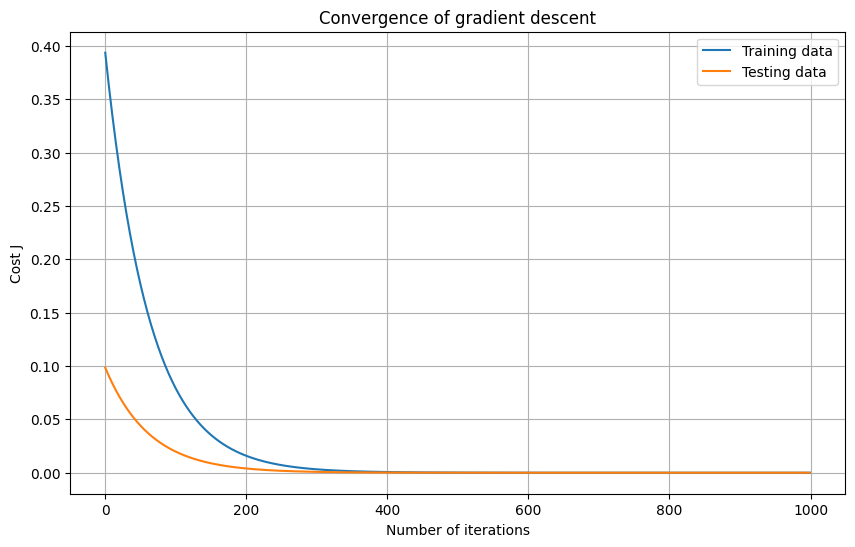

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[9.99673091e-01 1.14635808e-03 6.88542215e-07 2.90254116e-07
 4.07258102e-07 1.99021182e-07 3.28132476e-08 6.83660767e-08
 7.81297850e-09 6.03495191e-08 1.45736036e-07 4.50717928e-08]


In [ ]:
# Ques 2B, Standardization
data = pd.DataFrame(pd.read_csv('/Housing.csv'))
data.head()
m = len(data)
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 13)

In [ ]:
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
#To not get any faulty errors eg Nan also not asked in Q -
data = data.drop(labels = "furnishingstatus",axis=1)
#data.head()

#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 12)

In [ ]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataTrainB = dataTrain[list2]
dataTestB = dataTest[list2]
dataTrainB.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [ ]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = StandardScaler() #uncomment when testing standardization
#scaler = MinMaxScaler(). #uncomment when testing Minmaxscaler
#scaler = Normalizer()
dataTrainB[list2] = scaler.fit_transform(dataTrainB[list2])
dataTestB[list2] = scaler.fit_transform(dataTestB[list2])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,0.325559,1.753501
175,0.247444,2.175399,1.399408,1.475561,0.212914,0.395599,2.159245,-0.698609,-0.201427,-0.691351,1.470267,-0.570288
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,0.395599,-0.463125,1.431416,-0.201427,-0.691351,-0.819149,-0.570288


In [ ]:
dataTrainB.shape

(436, 12)

In [ ]:
yTrainB = dataTrainB.values[:,0]
xTrainB = dataTrainB.values[:,1:12]
yTestB = dataTestB.values[:,0]
xTestB = dataTestB.values[:,1:12]
xTrainB.shape

(436, 11)

In [ ]:
xTestB.shape

(109, 11)

In [ ]:
#1 col of ones
x31 = np.ones((436, 1))
x32 = np.ones((109, 1))

In [ ]:
# 1d to 2d
x41 = xTrainB.reshape(436, 11)
x42 = xTestB.reshape(109, 11)

xTrainNewB = np.hstack((x31, x41))
xTestNewB = np.hstack((x32, x42))
xTrainNewB.shape

(436, 12)

In [ ]:
iterations = 1000;
alpha = 0.01;
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]


In [ ]:
theta, costHistoryTrain, costHistoryTest = gradient_descent(xTrainNewB, xTestNewB, yTrainB, yTestB, theta, alpha, iterations)
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])


Final value of theta = [2.66486120e-16 2.85466367e-01 5.85510599e-02 2.60010697e-01
 1.98840802e-01 8.65573865e-02 8.85477294e-02 8.59667386e-02
 1.26174544e-01 2.19948910e-01 1.12328332e-01 1.60748648e-01]
costHistoryTrain = 0.13132791876005034 costHistoryTest=  0.03198914525570618


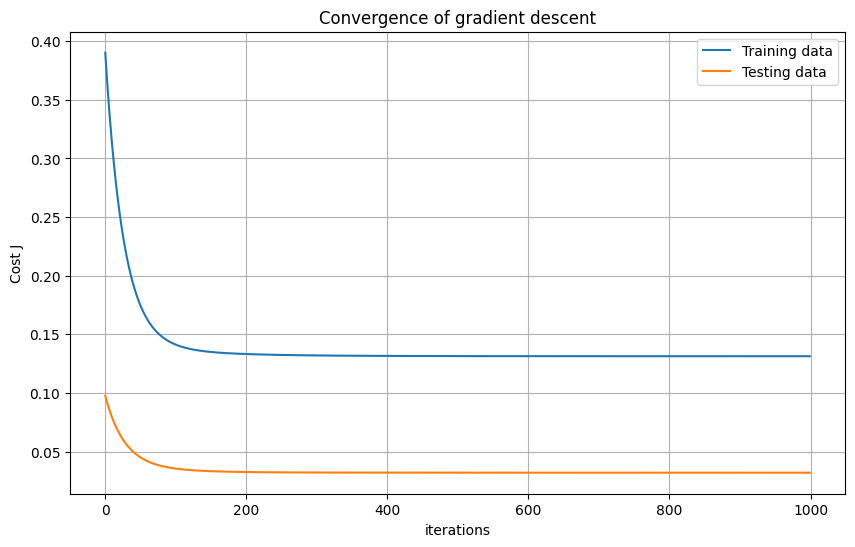

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[2.66486120e-16 2.85466367e-01 5.85510599e-02 2.60010697e-01
 1.98840802e-01 8.65573865e-02 8.85477294e-02 8.59667386e-02
 1.26174544e-01 2.19948910e-01 1.12328332e-01 1.60748648e-01]


In [ ]:
#Ques 3B, Normalizer
data = pd.DataFrame(pd.read_csv('/Housing.csv'))
data.head()
m = len(data)

In [ ]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
data = data.drop(labels = "furnishingstatus",axis=1)
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 12)

In [ ]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dataTrainC = dataTrain[list2]
dataTestC = dataTest[list2]
dataTrainC.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [ ]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
#scaler = StandardScaler() #uncomment when testing standardization
#scaler = MinMaxScaler(). #uncomment when testing Minmaxscaler
scaler = Normalizer() #uncomment when testing normalization
dataTrainC[list2] = scaler.fit_transform(dataTrainC[list2])
dataTestC[list2] = scaler.fit_transform(dataTestC[list2])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,0.325559,1.753501
175,0.247444,2.175399,1.399408,1.475561,0.212914,0.395599,2.159245,-0.698609,-0.201427,-0.691351,1.470267,-0.570288
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,0.395599,-0.463125,1.431416,-0.201427,-0.691351,-0.819149,-0.570288


In [ ]:
dataTrainC.shape

(436, 12)

In [ ]:
yTrainC = dataTrainC.values[:,0]
xTrainC = dataTrainC.values[:,1:12]
yTestC = dataTestC.values[:,0]
xTestC = dataTestC.values[:,1:12]
xTrainC.shape

(436, 11)

In [ ]:
xTestC.shape

(109, 11)

In [ ]:
#1 col of ones
x51 = np.ones((436, 1))
x52 = np.ones((109, 1))

# 1d to 2d
x61 = xTrainC.reshape(436, 11)
x62 = xTestC.reshape(109, 11)

xTrainNewC = np.hstack((x31, x41))
xTestNewC = np.hstack((x32, x42))
xTrainNewC.shape

(436, 12)

In [ ]:
iterations = 5000;
alpha = 0.01;
lamda : 3
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def compute_cost_reg(X, Y, theta, lamda):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  sqrErrors = np.sum(sqrErrors)
  reg_term = lamda * np.sum(np.square(theta))
  J = 1 / (2 * m) * np.sum(sqrErrors + reg_term)
  return J


In [ ]:
def gradient_descent_reg(X1, X2, Y1 , Y2, theta, alpha, iterations, lamda):
  costHistoryTrain = np.zeros(iterations)
  costHistoryTest = np.zeros(iterations)
  lamda = 3
  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    costHistoryTrain[i] = compute_cost_reg(X1, Y1, theta, lamda)
    costHistoryTest[i] = compute_cost(X2, Y2, theta)
  return theta, costHistoryTrain, costHistoryTest

In [ ]:
theta, costHistoryTrain, costHistoryTest = gradient_descent_reg(xTrainNewC, xTestNewC, yTrainC, yTestC, theta, alpha, iterations, lamda=3 )
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

Final value of theta = [ 9.99999244e-01 -4.95453932e-07  6.06190609e-08  1.28659290e-07
  1.08164245e-07  4.05782886e-08  5.14875188e-08  7.59147942e-08
  5.01040682e-08  1.30983936e-07  5.66143471e-08  1.16840533e-07]
costHistoryTrain = 0.0027522894144052217 costHistoryTest=  9.980633506597963e-15


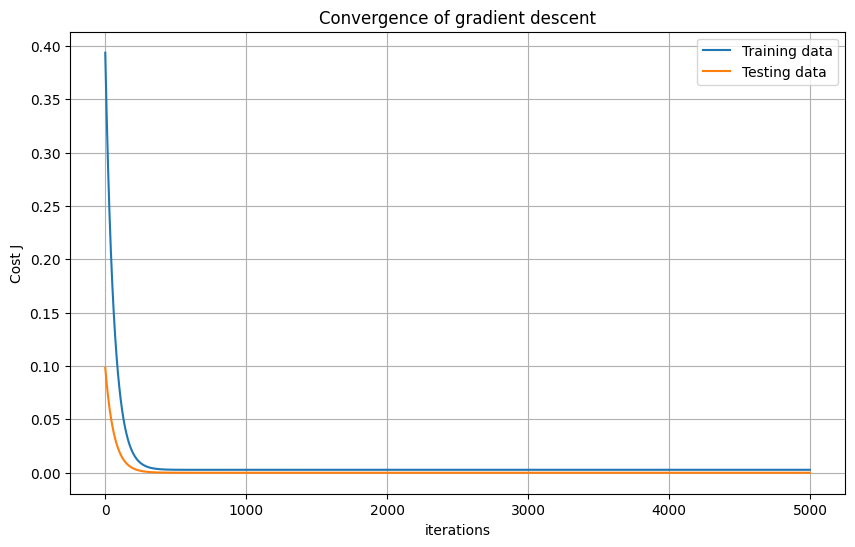

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[ 9.99999244e-01 -4.95453932e-07  6.06190609e-08  1.28659290e-07
  1.08164245e-07  4.05782886e-08  5.14875188e-08  7.59147942e-08
  5.01040682e-08  1.30983936e-07  5.66143471e-08  1.16840533e-07]


In [ ]:
#Ques 3B, Standardization
data = pd.DataFrame(pd.read_csv('/Housing.csv'))
data.head()
m = len(data)

In [ ]:
#converting yes's & no's to 1s & 0s as strings cannot be used only int
list1 = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map (v1) :
  return v1.map({'yes' : 1, "no": 0})
data[list1] = data[list1] . apply(binary_map)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
#To not get any faulty errors eg Nan also not asked in Q -
data = data.drop(labels = "furnishingstatus",axis=1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
#splitting dataframe into 80% training data & 20% testing data
np.random.seed(0)
dataTrain, dataTest =train_test_split(data, train_size = 0.8, test_size = 0.2)
dataTrain.shape

(436, 12)

In [ ]:
list2 = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
dfTrainC = dataTrain[list2]
dfTestC = dataTest[list2]
dfTrainC.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0


In [ ]:
import warnings
warnings. filterwarnings( 'ignore' )
from sklearn. preprocessing import MinMaxScaler, StandardScaler, Normalizer
scaler = StandardScaler() #uncomment when testing standardization
#scaler = MinMaxScaler(). #uncomment when testing Minmaxscaler
#scaler = Normalizer() #uncomment when testing normalization
dataTrainC[list2] = scaler.fit_transform(dataTrainC[list2])
dataTestC[list2] = scaler.fit_transform(dataTestC[list2])
dataTrainB.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,-1.586001,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
496,-1.090971,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
484,-0.999299,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
507,-1.145974,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
252,-0.137579,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
263,-0.192583,-0.553912,0.052516,-0.573307,0.212914,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
240,-0.100910,-0.613815,0.052516,-0.573307,0.212914,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,0.325559,1.753501
175,0.247444,2.175399,1.399408,1.475561,0.212914,0.395599,2.159245,-0.698609,-0.201427,-0.691351,1.470267,-0.570288
385,-0.632610,-0.707412,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288
374,-0.595941,-0.763571,-1.294376,1.475561,-0.933142,0.395599,-0.463125,1.431416,-0.201427,-0.691351,-0.819149,-0.570288


In [ ]:
dataTrainC.shape

(436, 12)

In [ ]:
yTrainC = dataTrainC.values[:,0]
xTrainC = dataTrainC.values[:,1:12]
yTestC = dataTestC.values[:,0]
xTestC = dataTestC.values[:,1:12]
xTrainC.shape

(436, 11)

In [ ]:
xTestC.shape

(109, 11)

In [ ]:
x51 = np.ones((436, 1))
x52 = np.ones((109, 1))

x61 = xTrainC.reshape(436, 11)
x62 = xTestC.reshape(109, 11)

xTrainNewC = np.hstack((x31, x41))
xTestNewC = np.hstack((x32, x42))
xTrainNewC.shape

(436, 12)

In [ ]:
iterations = 5000;
alpha = 0.01;
lamda : 3
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
def compute_cost_reg(X, Y, theta, lamda):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, Y)
  sqrErrors = np.square(errors)
  sqrErrors = np.sum(sqrErrors)
  reg_term = lamda * np.sum(np.square(theta))
  J = 1 / (2 * m) * np.sum(sqrErrors + reg_term)
  return J

In [ ]:
def gradient_descent_reg(X1, X2, Y1 , Y2, theta, alpha, iterations, lamda):
  costHistoryTrain = np.zeros(iterations)
  costHistoryTest = np.zeros(iterations)
  lamda = 3
  for i in range(iterations):
    predictions = X1.dot(theta)
    errors = np.subtract(predictions, Y1)
    sum_delta = (alpha / m) * X1.transpose().dot(errors);
    theta = theta - sum_delta;
    costHistoryTrain[i] = compute_cost_reg(X1, Y1, theta, lamda)
    costHistoryTest[i] = compute_cost(X2, Y2, theta)
  return theta, costHistoryTrain, costHistoryTest

In [ ]:
theta, costHistoryTrain, costHistoryTest = gradient_descent_reg(xTrainNewC, xTestNewC, yTrainC, yTestC, theta, alpha, iterations, lamda=3 )
print('Final value of theta =', theta)
print('costHistoryTrain =', costHistoryTrain[-1], 'costHistoryTest= ', costHistoryTest[-1])

Final value of theta = [-1.35671291e-16 -7.14063392e-01  8.73660485e-02  1.85427712e-01
  1.55889625e-01  5.84826732e-02  7.42053901e-02  1.09410728e-01
  7.22115188e-02  1.88778063e-01  8.15943323e-02  1.68394157e-01]
costHistoryTrain = 0.1884734188179672 costHistoryTest=  0.031770335063097316


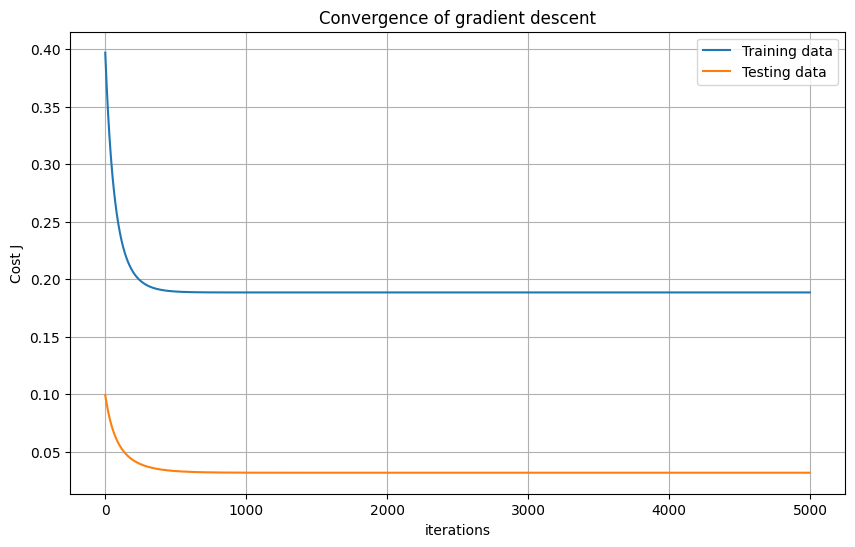

In [ ]:
plt.plot(costHistoryTrain, label = "Training data")
plt.plot(costHistoryTest, label = "Testing data")
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('iterations')
plt.ylabel('Cost J')
plt.title('Convergence of gradient descent')
plt.legend()

In [ ]:
print("Final Theta - ")
print(theta)

Final Theta - 
[-1.35671291e-16 -7.14063392e-01  8.73660485e-02  1.85427712e-01
  1.55889625e-01  5.84826732e-02  7.42053901e-02  1.09410728e-01
  7.22115188e-02  1.88778063e-01  8.15943323e-02  1.68394157e-01]
